# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.001
-0.001
-0.001
0.0
-0.002
-0.002
0.98
0.983
0.985
0.982
0.983
1.966
1.966
1.966
1.966
2.946
2.949
2.95
2.95
2.949
3.93
3.932
3.933
3.933
3.932
4.913
4.916
4.917
4.917
4.917
5.902
5.901
5.901
5.902
6.588
6.591
6.592
6.591
6.591
6.591
7.275
7.273
7.275
8.256
8.261
8.261
8.26
8.26
9.244
9.246
9.248
9.247
9.246
10.23
10.232
10.234
10.231
10.234
11.222
11.226
11.226
11.225
11.225
12.209
12.211
12.213
12.213
12.213
13.195
13.197
13.198
13.203
13.202
13.758
13.761
13.761
13.761
14.319
14.322
14.323
14.323
14.323
15.311
15.313
15.314
15.314
15.313
16.297
16.299
16.301
16.299
16.299
17.286
17.286
17.286
17.286
18.273
18.273
18.272
18.271
19.258
19.258
19.258
19.257
20.248
20.248
20.247
20.247
20.936
20.936
20.936
20.936
21.65
21.649
21.646
21.648
22.637
22.637
22.634
22.635
23.624
23.624
23.623
23.623
24.618
24.618
24.617
24.617
25.605
25.605
25.603
25.602
26.591
26.59
26.59
26.59
27.577

56.175
56.175
56.174
56.174
56.174
56.173
56.173
56.173
56.173
56.173
56.173
56.172
56.172
56.172
56.172
56.172
56.172
56.172
56.172
56.172
56.172
56.172
56.172
56.172
56.172
56.171
56.171
56.216
56.216
56.261
56.308
56.308
56.352
56.351
56.351
56.351
56.351
56.351
56.378
56.378
56.377
56.377
56.377
56.377
56.377
56.377
56.377
56.377
56.378
56.378
56.377
56.377
56.376
56.376
56.375
56.375
56.375
56.375
56.375
56.375
56.375
56.374
56.374
56.374
56.374
56.373
56.373
56.373
56.373
56.373
56.373
56.372
56.372
56.372
56.372
56.372
56.372
56.372
56.372
56.372
56.372
56.372
56.372
56.372
56.371
56.529
56.529
56.529
56.529
56.529
56.529
56.528
56.552
56.552
56.552
56.552
56.552
56.552
56.552
56.552
56.552
56.552
56.551
56.551
56.55
56.55
56.55
56.55
56.55
56.55
56.55
56.55
56.549
56.549
56.549
56.549
56.548
56.548
56.548
56.548
56.547
56.547
56.547
56.547
56.546
56.546
56.546
56.546
56.546
56.546
56.546
56.546
56.547
56.547
56.547
56.547
56.546
56.546
56.545
56.544
56.589
56.589
56.635
56.681


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1505,3010,58.615
1506,3012,58.615
1507,3014,58.615
1508,3016,58.615


<IPython.core.display.Javascript object>


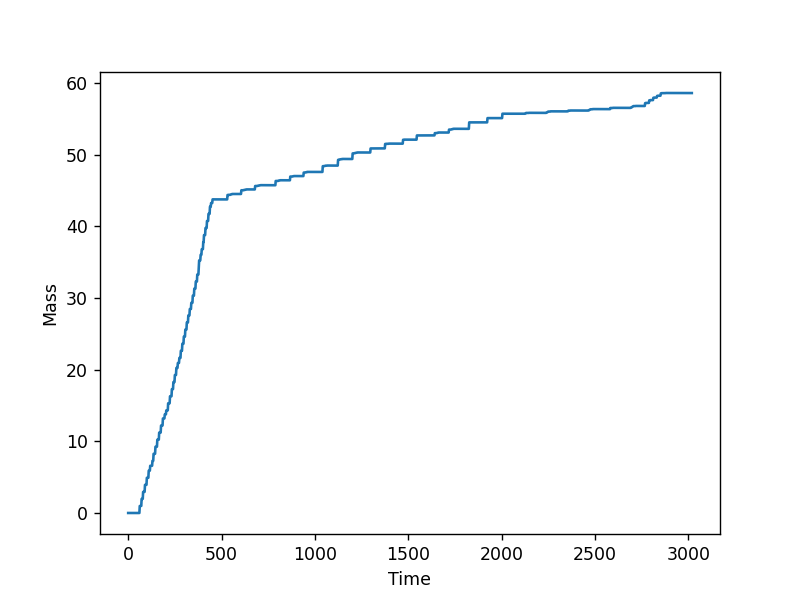

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_050923_S817-822.csv')